In [1]:
# 导入相关模块
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
# 画图
import seaborn as sns
import pandas as pd
import numpy as np
# 导入模型
# 交叉验证
from sklearn.model_selection import cross_val_score
# 决策树
from sklearn.tree import DecisionTreeRegressor
# 导入图
from sklearn.tree import export_graphviz
import graphviz
# 划分数据集
import sklearn.model_selection as skmodel
# 选择线性模型
import sklearn.linear_model as sklinear
# 特征处理，标准化
import sklearn.preprocessing as skprep
# 性能度量
import sklearn.metrics as skmetrics

In [2]:
df = pd.read_csv('郑州二七区数据.csv','|')
df = df.drop(columns = ['城市','区域'])
df['房价'].describe()

count     270.000000
mean      202.511111
std       303.843346
min        23.000000
25%        91.000000
50%       120.500000
75%       158.000000
max      2228.000000
Name: 房价, dtype: float64

In [3]:
df

,户型,面积,楼层,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,3,92.09,7,0,0,1,0,0,1,0,0,0,1,100
1,6,122.34,7,0,0,1,0,0,0,1,0,0,1,106
2,5,118.74,33,0,0,1,0,1,0,0,1,0,0,142
3,6,88.34,27,0,0,1,0,0,0,1,0,0,1,133
4,5,88.28,26,0,0,1,0,0,0,1,0,1,0,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2,73.81,27,0,0,1,0,0,0,1,0,0,1,89
266,3,73.81,7,0,0,1,0,0,1,0,0,0,1,99
267,3,77.91,27,0,0,1,0,0,1,0,0,1,0,94
268,2,60.31,6,0,0,1,0,0,1,0,0,0,1,51


In [4]:
df = df[['面积','房价']]
df

,面积,房价
0,92.09,100
1,122.34,106
2,118.74,142
3,88.34,133
4,88.28,136
...,...,...
265,73.81,89
266,73.81,99
267,77.91,94
268,60.31,51


In [7]:
df = df[-(df['房价']>=500)]
df

,面积,房价
0,92.09,100
1,122.34,106
2,118.74,142
3,88.34,133
4,88.28,136
...,...,...
265,73.81,89
266,73.81,99
267,77.91,94
268,60.31,51


E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\mat

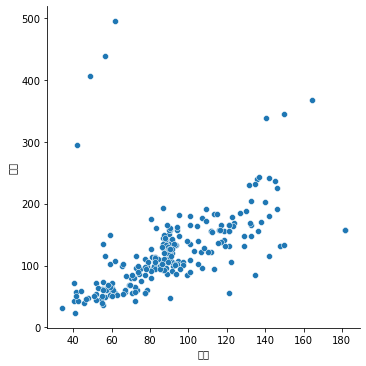

In [8]:
sns.relplot(x='面积', y='房价', data=df)

In [9]:
X = df.drop(columns = '房价')
y = df['房价']

In [10]:
x_train, x_test, y_train, y_test = skmodel.train_test_split(X , y , random_state=22)

In [11]:
# 恢复划分数据后的索引
for i in [x_train,x_test]:
    i.index=range(i.shape[0])
x_test

,面积
0,115.05
1,100.95
2,89.09
3,99.35
4,87.85
...,...
58,107.15
59,78.57
60,123.12
61,80.42


In [13]:
# 决策树模型
regressor = DecisionTreeRegressor() #实例化
# 传入完整数据,自动划分和循环
# 默认返回R平方,越接近1越好,有正有负
cross_val_score(regressor, X , y , cv=10)

array([ 0.16048468, -0.07810134, -3.78903828, -0.16901228, -0.08026923,
       -0.41359764,  0.53030862, -2.0460881 , -0.37429217, -0.06539605])

In [15]:
cross_score = cross_val_score(regressor, X , y , cv=10,scoring = "neg_mean_squared_error")
cross_score

array([ -2176.5825    ,  -1651.91      ,  -8897.65      ,  -1253.88444444,
        -1983.72      , -13772.39      ,  -2944.75      ,  -5208.45      ,
       -11222.25      ,  -2830.66666667])

In [16]:
# 求个平均
cross_score.mean()

-5194.22536111111

In [17]:
regressor2 = DecisionTreeRegressor()
regressor2.fit(x_train, y_train)

DecisionTreeRegressor()

In [18]:
y_predict = regressor2.predict(x_test)

In [24]:
score = regressor2.score(x_test, y_test)
score

0.1961708588429102